In [64]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

file_name = "C:\Raisin_Dataset.xlsx"
data=pd.read_excel(file_name)
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in data.columns:
    data[i]=le.fit_transform(data[i])
data

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,551,553,500,558,542,811,544,1
1,404,446,409,469,413,299,453,1
2,583,554,581,448,571,102,573,1
3,74,54,159,108,68,394,66,1
4,462,254,709,33,445,890,382,1
...,...,...,...,...,...,...,...,...
895,504,512,449,542,492,215,461,0
896,549,546,540,508,549,99,577,0
897,640,517,739,174,650,722,656,0
898,600,633,506,683,600,177,622,0


In [65]:
type(data)

pandas.core.frame.DataFrame

In [66]:
data.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [67]:
data.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

Text(0.5, 1.0, 'Label')

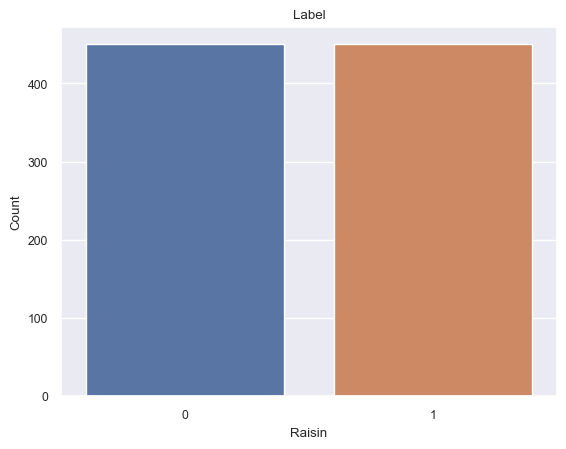

In [68]:
sns.countplot(data = data, x="Class")
plt.xlabel("Raisin")
plt.ylabel("Count")
plt.title("Label")

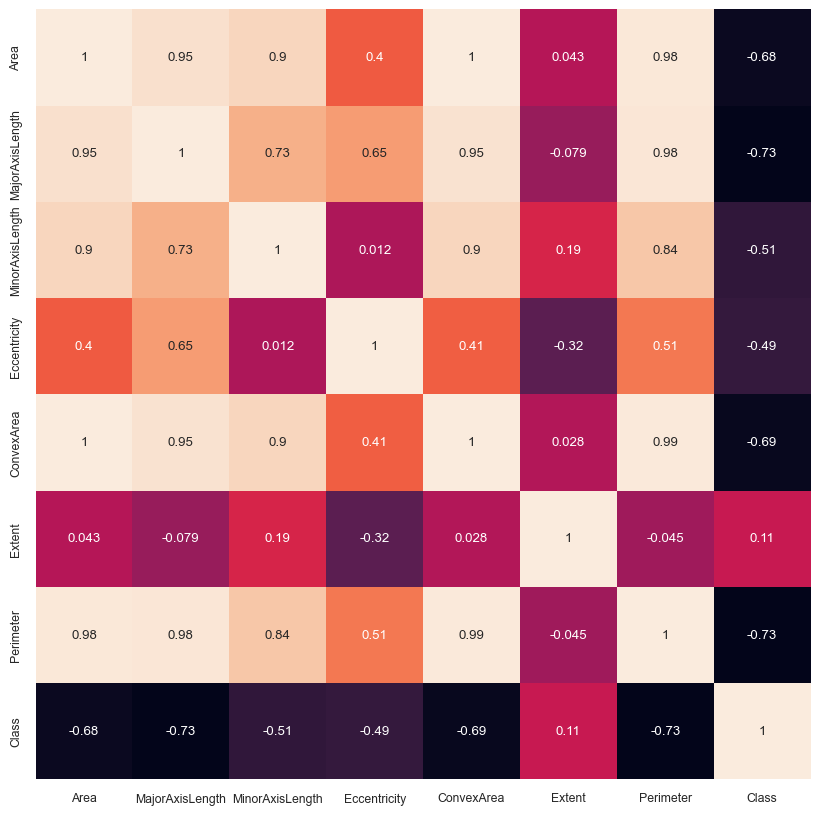

In [69]:
df_corr = data.corr()

plt.figure(figsize=(10, 10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [70]:
#Splitting the data into training and test test

X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 


In [71]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(1024,input_shape=(7,),activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

model.compile(Adam(lr=0.02),'binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 1024)              8192      
                                                                 
 dense_25 (Dense)            (None, 512)               524800    
                                                                 
 dense_26 (Dense)            (None, 512)               262656    
                                                                 
 dense_27 (Dense)            (None, 2)                 1026      
                                                                 
Total params: 796674 (3.04 MB)
Trainable params: 796674 (3.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:

model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
23/23 [==============================] - 4s 44ms/step - loss: 13.1453 - accuracy: 0.6653 - val_loss: 1.4009 - val_accuracy: 0.8167
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 1.0348 - accuracy: 0.7708 - val_loss: 0.8064 - val_accuracy: 0.8222
Epoch 3/100
23/23 [==============================] - 1s 29ms/step - loss: 0.6276 - accuracy: 0.8194 - val_loss: 0.4853 - val_accuracy: 0.8778
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 0.5988 - accuracy: 0.8000 - val_loss: 0.4360 - val_accuracy: 0.8611
Epoch 5/100
23/23 [==============================] - 1s 32ms/step - loss: 0.4707 - accuracy: 0.8347 - val_loss: 0.4400 - val_accuracy: 0.8611
Epoch 6/100
23/23 [==============================] - 1s 28ms/step - loss: 0.4053 - accuracy: 0.8306 - val_loss: 0.3334 - val_accuracy: 0.8833
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 0.5034 - accuracy: 0.8194 - val_loss: 0.4166 - val_accuracy: 0.8778
Epoch

23/23 [==============================] - 1s 27ms/step - loss: 0.3472 - accuracy: 0.8472 - val_loss: 0.3735 - val_accuracy: 0.8556
Epoch 59/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3273 - accuracy: 0.8681 - val_loss: 0.3288 - val_accuracy: 0.9056
Epoch 60/100
23/23 [==============================] - 1s 27ms/step - loss: 0.3109 - accuracy: 0.8694 - val_loss: 0.2817 - val_accuracy: 0.9056
Epoch 61/100
23/23 [==============================] - 1s 27ms/step - loss: 0.3343 - accuracy: 0.8611 - val_loss: 0.3398 - val_accuracy: 0.9000
Epoch 62/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3377 - accuracy: 0.8556 - val_loss: 0.3337 - val_accuracy: 0.9167
Epoch 63/100
23/23 [==============================] - 1s 24ms/step - loss: 0.3068 - accuracy: 0.8708 - val_loss: 0.3023 - val_accuracy: 0.8889
Epoch 64/100
23/23 [==============================] - 1s 28ms/step - loss: 0.3027 - accuracy: 0.8764 - val_loss: 0.2944 - val_accuracy: 0.8944
Epoch 65/100

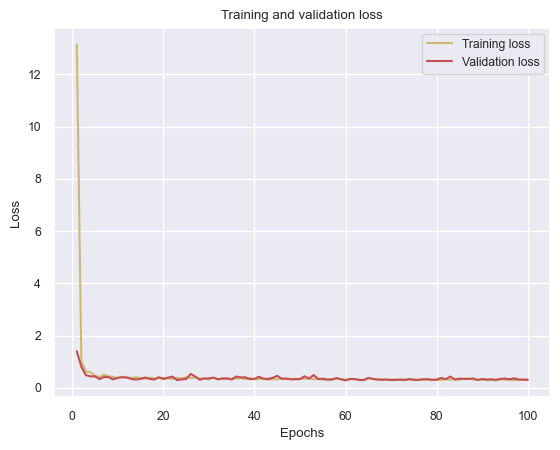

In [73]:

import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

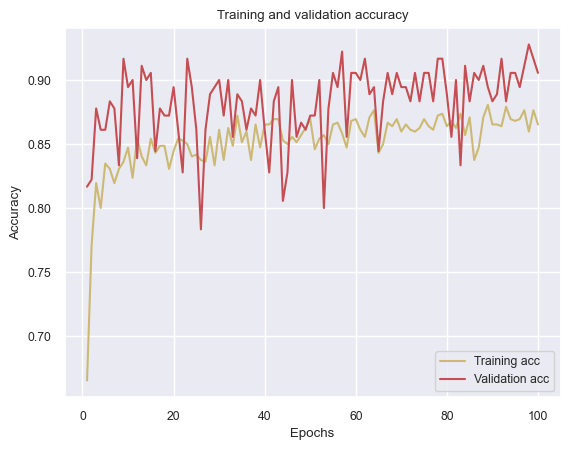

In [74]:
acc =model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [75]:

#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))


              precision    recall  f1-score   support

           0       0.91      0.92      0.91        97
           1       0.90      0.89      0.90        83

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180

[[89  8]
 [ 9 74]]
